In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

In [ ]:
%time

model = Sequential()

model.add(Conv2D(16,
                 kernel_size = (3,3),
                 input_shape = (28, 28, 3),
                 activation = 'relu',
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Conv2D(256,
                 kernel_size = (3,3),
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(10,activation='softmax'))

model.summary()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                          

In [ ]:
len(model.layers)

22

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/cnn_model.h5',
                                              monitor='val_acc',
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

In [ ]:
%time

optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Pixel_File_Tomato.csv')

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,2343,2344,2345,2346,2347,2348,2349,2350,2351,label
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,6
1,199,172,168,200,173,169,191,164,160,194,...,123,101,103,118,96,98,112,90,92,6
2,148,148,148,141,141,141,155,156,154,140,...,97,101,102,98,102,104,96,100,101,0
3,112,109,124,173,170,185,144,142,154,130,...,146,143,158,147,144,159,153,150,165,5
4,180,175,176,181,176,177,179,174,175,174,...,124,120,125,137,133,138,146,142,147,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,98,98,110,123,123,135,115,115,127,113,...,154,153,163,143,143,148,158,157,167,0
22946,131,138,155,118,125,142,99,105,124,117,...,148,147,158,156,154,166,154,152,164,0
22947,180,170,183,153,142,156,150,140,153,125,...,144,129,143,135,125,138,135,125,138,4
22948,130,130,142,146,146,157,130,132,143,138,...,95,97,115,106,109,124,117,120,135,0


In [ ]:
print(len(df))
y = df.label
x = df.drop(columns = ['label'])

22950


In [ ]:
print(y)
print(x)

0        6
1        6
2        0
3        5
4        8
        ..
22945    0
22946    0
22947    4
22948    0
22949    6
Name: label, Length: 22950, dtype: int64
         0    1    2    3    4    5    6    7    8    9  ...  2342  2343  \
0        3    3    3    3    3    3    3    3    3    3  ...     3     3   
1      199  172  168  200  173  169  191  164  160  194  ...    93   123   
2      148  148  148  141  141  141  155  156  154  140  ...   105    97   
3      112  109  124  173  170  185  144  142  154  130  ...   160   146   
4      180  175  176  181  176  177  179  174  175  174  ...   155   124   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
22945   98   98  110  123  123  135  115  115  127  113  ...   144   154   
22946  131  138  155  118  125  142   99  105  124  117  ...   174   148   
22947  180  170  183  153  142  156  150  140  153  125  ...   145   144   
22948  130  130  142  146  146  157  130  132  143  138  ...   110    95   
22

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [ ]:
x_train = np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

In [ ]:
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    validation_split=0.1,
                    batch_size = 64,
                    epochs = 30,
                    shuffle=True,
                    callbacks=[callback])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/30
217/217 [==============================] - ETA: 0s - loss: 0.2453 - accuracy: 0.9305

217/217 [==============================] - 35s 162ms/step - loss: 0.2453 - accuracy: 0.9305 - val_loss: 0.4457 - val_accuracy: 0.8570
Epoch 2/30
216/217 [============================>.] - ETA: 0s - loss: 0.2539 - accuracy: 0.9281

217/217 [==============================] - 30s 140ms/step - loss: 0.2542 - accuracy: 0.9279 - val_loss: 0.4445 - val_accuracy: 0.8589
Epoch 3/30
216/217 [============================>.] - ETA: 0s - loss: 0.2376 - accuracy: 0.9371

217/217 [==============================] - 30s 138ms/step - loss: 0.2377 - accuracy: 0.9371 - val_loss: 0.4446 - val_accuracy: 0.8622
Epoch 4/30
216/217 [============================>.] - ETA: 0s - loss: 0.2336 - accuracy: 0.9358

217/217 [==============================] - 30s 140ms/step - loss: 0.2338 - accuracy: 0.9355 - val_loss: 0.4432 - val_accuracy: 0.8576
Epoch 5/30
216/217 [============================>.] - ETA: 0s - loss: 0.2312 - accuracy: 0.9363

217/217 [==============================] - 30s 139ms/step - loss: 0.2320 - accuracy: 0.9360 - val_loss: 0.4440 - val_accuracy: 0.8583
Epoch 6/30
216/217 [============================>.] - ETA: 0s - loss: 0.2317 - accuracy: 0.9367

217/217 [==============================] - 30s 138ms/step - loss: 0.2318 - accuracy: 0.9367 - val_loss: 0.4395 - val_accuracy: 0.8635
Epoch 7/30
216/217 [============================>.] - ETA: 0s - loss: 0.2309 - accuracy: 0.9357

217/217 [==============================] - 32s 147ms/step - loss: 0.2309 - accuracy: 0.9357 - val_loss: 0.4488 - val_accuracy: 0.8589
Epoch 8/30
216/217 [============================>.] - ETA: 0s - loss: 0.2227 - accuracy: 0.9381

217/217 [==============================] - 30s 140ms/step - loss: 0.2228 - accuracy: 0.9381 - val_loss: 0.4481 - val_accuracy: 0.8570
Epoch 9/30
216/217 [============================>.] - ETA: 0s - loss: 0.2191 - accuracy: 0.9412

217/217 [==============================] - 30s 140ms/step - loss: 0.2192 - accuracy: 0.9411 - val_loss: 0.4435 - val_accuracy: 0.8622
Epoch 10/30
216/217 [============================>.] - ETA: 0s - loss: 0.2190 - accuracy: 0.9387

217/217 [==============================] - 30s 140ms/step - loss: 0.2195 - accuracy: 0.9384 - val_loss: 0.4474 - val_accuracy: 0.8635
Epoch 11/30
216/217 [============================>.] - ETA: 0s - loss: 0.2085 - accuracy: 0.9442

217/217 [==============================] - 30s 140ms/step - loss: 0.2087 - accuracy: 0.9441 - val_loss: 0.4471 - val_accuracy: 0.8602
Epoch 12/30
216/217 [============================>.] - ETA: 0s - loss: 0.2062 - accuracy: 0.9442

217/217 [==============================] - 30s 140ms/step - loss: 0.2063 - accuracy: 0.9441 - val_loss: 0.4470 - val_accuracy: 0.8628
Epoch 13/30
217/217 [==============================] - ETA: 0s - loss: 0.2102 - accuracy: 0.9430

217/217 [==============================] - 31s 143ms/step - loss: 0.2102 - accuracy: 0.9430 - val_loss: 0.4540 - val_accuracy: 0.8583
Epoch 14/30
217/217 [==============================] - ETA: 0s - loss: 0.1979 - accuracy: 0.9463

217/217 [==============================] - 31s 144ms/step - loss: 0.1979 - accuracy: 0.9463 - val_loss: 0.4500 - val_accuracy: 0.8576
Epoch 15/30
217/217 [==============================] - ETA: 0s - loss: 0.1970 - accuracy: 0.9470

217/217 [==============================] - 31s 141ms/step - loss: 0.1970 - accuracy: 0.9470 - val_loss: 0.4491 - val_accuracy: 0.8609
Epoch 16/30
217/217 [==============================] - ETA: 0s - loss: 0.1980 - accuracy: 0.9456

217/217 [==============================] - 31s 144ms/step - loss: 0.1980 - accuracy: 0.9456 - val_loss: 0.4453 - val_accuracy: 0.8648
Epoch 17/30
217/217 [==============================] - ETA: 0s - loss: 0.1951 - accuracy: 0.9460

217/217 [==============================] - 32s 145ms/step - loss: 0.1951 - accuracy: 0.9460 - val_loss: 0.4535 - val_accuracy: 0.8576
Epoch 18/30
216/217 [============================>.] - ETA: 0s - loss: 0.1805 - accuracy: 0.9528

217/217 [==============================] - 30s 138ms/step - loss: 0.1807 - accuracy: 0.9527 - val_loss: 0.4545 - val_accuracy: 0.8622
Epoch 19/30
216/217 [============================>.] - ETA: 0s - loss: 0.1785 - accuracy: 0.9529

217/217 [==============================] - 30s 138ms/step - loss: 0.1788 - accuracy: 0.9527 - val_loss: 0.4471 - val_accuracy: 0.8596
Epoch 20/30
216/217 [============================>.] - ETA: 0s - loss: 0.1724 - accuracy: 0.9552

217/217 [==============================] - 30s 140ms/step - loss: 0.1726 - accuracy: 0.9551 - val_loss: 0.4492 - val_accuracy: 0.8609
Epoch 21/30
216/217 [============================>.] - ETA: 0s - loss: 0.1718 - accuracy: 0.9538

217/217 [==============================] - 30s 139ms/step - loss: 0.1719 - accuracy: 0.9538 - val_loss: 0.4477 - val_accuracy: 0.8635
Epoch 22/30
216/217 [============================>.] - ETA: 0s - loss: 0.1704 - accuracy: 0.9544

217/217 [==============================] - 30s 139ms/step - loss: 0.1707 - accuracy: 0.9542 - val_loss: 0.4567 - val_accuracy: 0.8635
Epoch 23/30
216/217 [============================>.] - ETA: 0s - loss: 0.1646 - accuracy: 0.9566

217/217 [==============================] - 30s 140ms/step - loss: 0.1651 - accuracy: 0.9564 - val_loss: 0.4570 - val_accuracy: 0.8622
Epoch 24/30
216/217 [============================>.] - ETA: 0s - loss: 0.1660 - accuracy: 0.9567

217/217 [==============================] - 30s 139ms/step - loss: 0.1660 - accuracy: 0.9566 - val_loss: 0.4564 - val_accuracy: 0.8622
Epoch 25/30
216/217 [============================>.] - ETA: 0s - loss: 0.1605 - accuracy: 0.9593

217/217 [==============================] - 31s 141ms/step - loss: 0.1605 - accuracy: 0.9592 - val_loss: 0.4625 - val_accuracy: 0.8563
Epoch 26/30
216/217 [============================>.] - ETA: 0s - loss: 0.1562 - accuracy: 0.9583

217/217 [==============================] - 32s 150ms/step - loss: 0.1569 - accuracy: 0.9582 - val_loss: 0.4581 - val_accuracy: 0.8628
Epoch 27/30
216/217 [============================>.] - ETA: 0s - loss: 0.1605 - accuracy: 0.9575

217/217 [==============================] - 30s 140ms/step - loss: 0.1605 - accuracy: 0.9574 - val_loss: 0.4719 - val_accuracy: 0.8544
Epoch 28/30
217/217 [==============================] - ETA: 0s - loss: 0.1542 - accuracy: 0.9589

217/217 [==============================] - 31s 144ms/step - loss: 0.1542 - accuracy: 0.9589 - val_loss: 0.4624 - val_accuracy: 0.8596
Epoch 29/30
217/217 [==============================] - ETA: 0s - loss: 0.1506 - accuracy: 0.9595

217/217 [==============================] - 31s 142ms/step - loss: 0.1506 - accuracy: 0.9595 - val_loss: 0.4630 - val_accuracy: 0.8557
Epoch 30/30
217/217 [==============================] - ETA: 0s - loss: 0.1459 - accuracy: 0.9619

217/217 [==============================] - 31s 140ms/step - loss: 0.1459 - accuracy: 0.9619 - val_loss: 0.4636 - val_accuracy: 0.8589
Duration: 0:16:22.126715


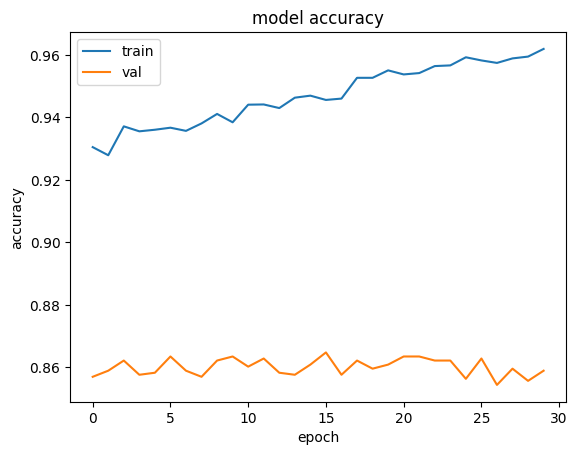

val 0.8647594451904297
min val 0.8543562889099121
acc 0.961916446685791
mean val 0.8600780288378398


In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])


plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()
print('val',max(history.history['val_accuracy']))
print('min val', min(history.history['val_accuracy']))
print('acc',max(history.history['accuracy']))
print('mean val', sum(history.history['val_accuracy'])/len(history.history['val_accuracy']))

In [ ]:
x_test = np.array(x_test, dtype=np.uint8).reshape(-1,28,28,3)

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/cnn_model.h5')


474/474 [==============================] - 6s 13ms/step


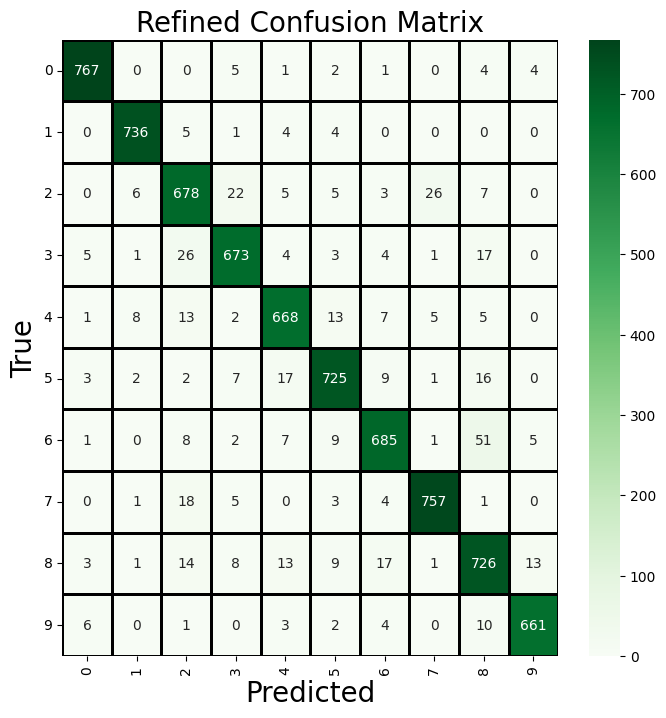

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
Pred = model.predict(x_test, batch_size=16)
Pred_Label = np.argmax(Pred, axis=1)
ConfusionM = confusion_matrix(list(y_test), Pred_Label, labels=[0,1,2,3,4,5,6,7,8,9])
cm = ConfusionM
targetnames = [0,1,2,3,4,5,6,7,8,9]
class_names = targetnames
# Plot confusion matrix
fig = plt.figure(figsize=(8, 8))
ax= plt.subplot()
sns.heatmap(cm,cmap= "Greens", linecolor = 'black' , linewidth = 1 , annot = True, fmt=''); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

(7574,)
ROC AUC score: 0.9635776054389111


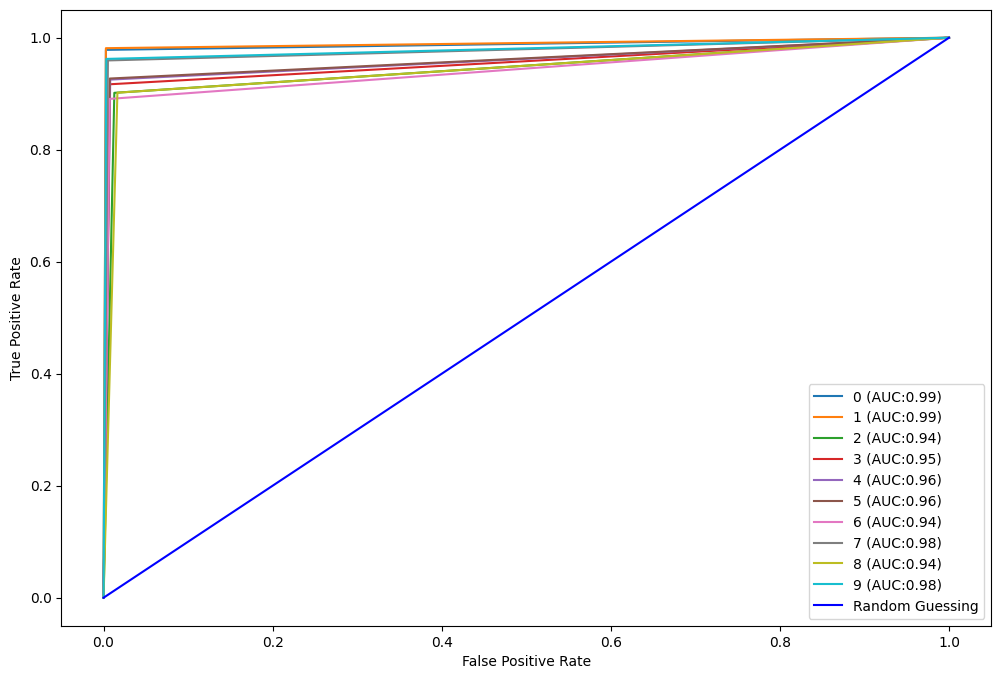

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= [0,1,2,3,4,5,6,7,8,9]

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    print(y_test.shape)
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)



print('ROC AUC score:', multiclass_roc_auc_score(y_test, Pred_Label))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
targetnames = [0,1,2,3,4,5,6,7,8,9]
tar = []
for i in targetnames:
  tar.append(str(i))
class_report = classification_report(list(y_test), Pred_Label, labels=[0, 1, 2, 3, 4, 5, 6,7,8,9], target_names=tar)

In [ ]:
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       784
           1       0.97      0.98      0.98       750
           2       0.89      0.90      0.89       752
           3       0.93      0.92      0.92       734
           4       0.93      0.93      0.93       722
           5       0.94      0.93      0.93       782
           6       0.93      0.89      0.91       769
           7       0.96      0.96      0.96       789
           8       0.87      0.90      0.88       805
           9       0.97      0.96      0.96       687

    accuracy                           0.93      7574
   macro avg       0.94      0.93      0.93      7574
weighted avg       0.93      0.93      0.93      7574



In [ ]:
model.save_weights('/content/drive/MyDrive/cnn_model_weights.h5')

In [ ]:
model.save('/content/drive/MyDrive/cnn_model.h5')